# Bike Sharing Demand - Linear Regression Assignment

### By Abhishek Mukherjee

## Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

I'm required to model the demand for shared bikes with the available independent variables as part of this assignment. In real scenario it can be used by the company to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market

## Solution Approach

I will be performing the following steps to find the significant predictors against the demand for shared bikes and how well those variables describe the bike demand:

1. Importing necessary libraries for data visualization, EDA, model building and evaluation
2. Loading required Dataset
3. Understanding Problem Statement (in terms of dependent and independent variables)
4. Data Understanding
5. Missing and Duplicate Values Check
6. EDA
7. Preprocessing - Dummy Creation
8. Train-Test Split
9. Scaling
10. Feature Selection - RFE
11. Manual Feature Selection
12. Residual Analysis of train data
13. Making predictions using Final Model
14. Model Evaluation
15. Conclusion

## 1. Importing Necessary Libraries

In [1]:
# For data analysis and numerical functions
import pandas as pd
import numpy as np

# For Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

# import warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Load Dataset

In [2]:
bike_df = pd.read_csv('day.csv')
bike_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Lets check the descriptive statistics on the data

bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## 3. Understanding Problem statement

Lets understand what the columns mean and which is the target variable that needs to be predicted

Loading the data dictionary here for convinience
- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
    
Based on instructions we should use **"cnt"** as the ***Target Variable***
  
Some of the independent variables are coded, we will convert them to interpretable values for better data visualization


## 4. Data Understanding

In [4]:
# Check the shape of the dataset, number of records and columns
bike_df.shape

(730, 16)

In [5]:
# Check the initial information of the dataset, we get an idea if there are null records
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Lets check the descriptive statistics on the data

bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Check unique value counts in each column

bike_df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [8]:
# Lets get the freqeusncies of the categorical variables

print("Frequency of Season: \n", bike_df.season.value_counts())
print("Frequency of Year: \n", bike_df.yr.value_counts())
print("Frequency of Month: \n", bike_df.mnth.value_counts())
print("Frequency of Weekday: \n", bike_df.weekday.value_counts())
print("Frequency of Working Day: \n", bike_df.workingday.value_counts())
print("Frequency of Weather: \n", bike_df.weathersit.value_counts())

Frequency of Season: 
 3    188
2    184
1    180
4    178
Name: season, dtype: int64
Frequency of Year: 
 1    365
0    365
Name: yr, dtype: int64
Frequency of Month: 
 12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64
Frequency of Weekday: 
 6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64
Frequency of Working Day: 
 1    499
0    231
Name: workingday, dtype: int64
Frequency of Weather: 
 1    463
2    246
3     21
Name: weathersit, dtype: int64


## 5. Missing Value & Duplicate Check

In [9]:
# Check the missing value percentages

bike_df.isnull().sum()/bike_df.shape[0]

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

So we don't have missing values in the data

In [10]:
# Check for duplicate values

bike_df.duplicated().sum()

0

So there are no duplicate observations

## 6. EDA

From the above data understanding we saw that certain independent variables were coded. So we will try to convert them to their original values and plot the visualizations to get a fair understanding of some of the patterns. We will do Univariate, Bivariate and Multi-Variate analysis before proceeding forward with modelling.

In [11]:
# The holiday variable seem to be redundant with workday and instant is a record index, We will drop them

bike_df = bike_df.drop(["instant", "holiday"], axis = 1)

In [12]:
bike_df.head()

,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
# Check datatype of dteday
bike_df["dteday"].dtype

dtype('O')

In [14]:
# We will convert the "dteday" to date
bike_df["dteday"] = pd.to_datetime(bike_df["dteday"])

In [15]:
# Extract the year and month from this day and drop the existing "yr" and "mnth" and "dteday" columns
# as they would be redundant

bike_df["year"] = bike_df["dteday"].dt.year
bike_df["month"] = bike_df["dteday"].dt.month

In [16]:
bike_df["year"].unique()

array([2018, 2019])

In [17]:
bike_df["month"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [18]:
bike_df = bike_df.drop(["yr", "mnth", "dteday"], axis=1)

In [19]:
# Drop the casual and registered variables as well as they contribute to the target "cnt" dependent variable
# and we cannot use these two variable in model training

bike_df = bike_df.drop(["casual", "registered"], axis=1)

In [20]:
# Convert encoded values of categorical columns to original prior to data visualization
# Lets convert "season"

bike_df["season"] = bike_df["season"].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [21]:
# Next convert "weathersit"

bike_df["weathersit"] = bike_df["weathersit"].map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'})

In [22]:
# Next convert "weekday"

bike_df["weekday"] = bike_df["weekday"].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

In [23]:
# Next Convert "workingday"

bike_df["workingday"] = bike_df["workingday"].map({1:'working_day',0:'holiday'})

In [24]:
# Next convert "month"

bike_df["month"] = bike_df["month"].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [25]:
# Check the dataFrame now

bike_df.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,spring,Sun,holiday,Mist,14.110847,18.18125,80.5833,10.749882,985,2018,Jan
1,spring,Mon,holiday,Mist,14.902598,17.68695,69.6087,16.652113,801,2018,Feb
2,spring,Tue,working_day,Clear,8.050924,9.47025,43.7273,16.636703,1349,2018,Mar
3,spring,Wed,working_day,Clear,8.200000,10.60610,59.0435,10.739832,1562,2018,Apr
4,spring,Thu,working_day,Clear,9.305237,11.46350,43.6957,12.522300,1600,2018,May


### 6.1 Univariate Analysis

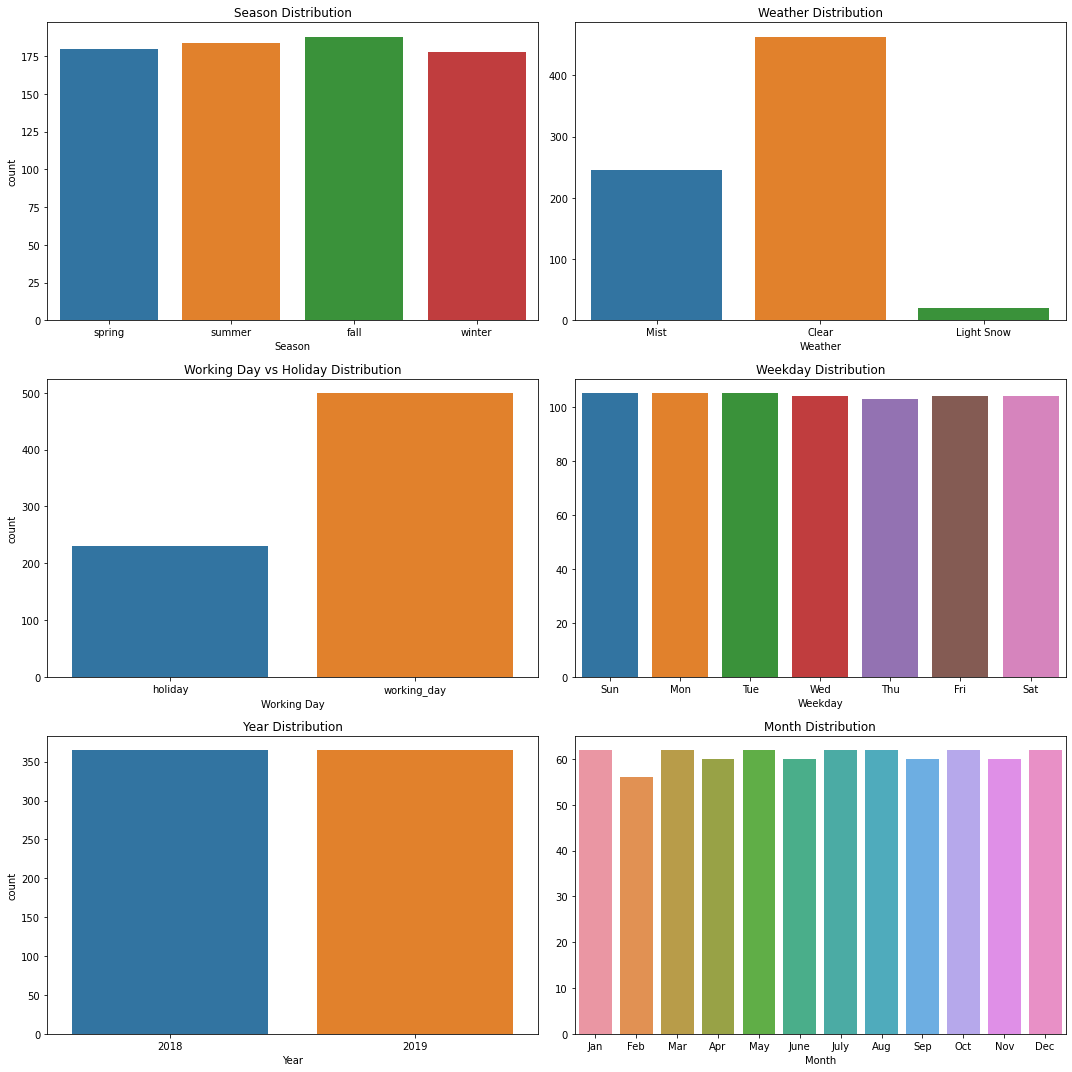

In [26]:
# Data Visualization of Catagorical variables

plt.figure(figsize=[15, 15])

plt.subplot(3, 2, 1)
sns.countplot(data=bike_df, x="season")
plt.xlabel("Season")
plt.title("Season Distribution")

plt.subplot(3, 2, 2)
sns.countplot(data=bike_df, x="weathersit").set(ylabel=None)
plt.xlabel("Weather")
plt.title("Weather Distribution")

plt.subplot(3, 2, 3)
sns.countplot(data=bike_df, x="workingday")
plt.xlabel("Working Day")
plt.title("Working Day vs Holiday Distribution")

plt.subplot(3, 2, 4)
sns.countplot(data=bike_df, x="weekday").set(ylabel=None)
plt.xlabel("Weekday")
plt.title("Weekday Distribution")

plt.subplot(3, 2, 5)
sns.countplot(data=bike_df, x="year")
plt.xlabel("Year")
plt.title("Year Distribution")

plt.subplot(3, 2, 6)
sns.countplot(data=bike_df, x="month").set(ylabel=None)
plt.xlabel("Month")
plt.title("Month Distribution")

plt.tight_layout()
plt.show()

#### Analysis

1. All four seasons are mostly equally represented in data
2. There are more observations with Clear weather
3. Workdays are represented more in the data
4. All weekdays are more or less equally represented in data
5. There were equal observations during 2018 and 2019
6. All months are more or less equally represented in the dataset


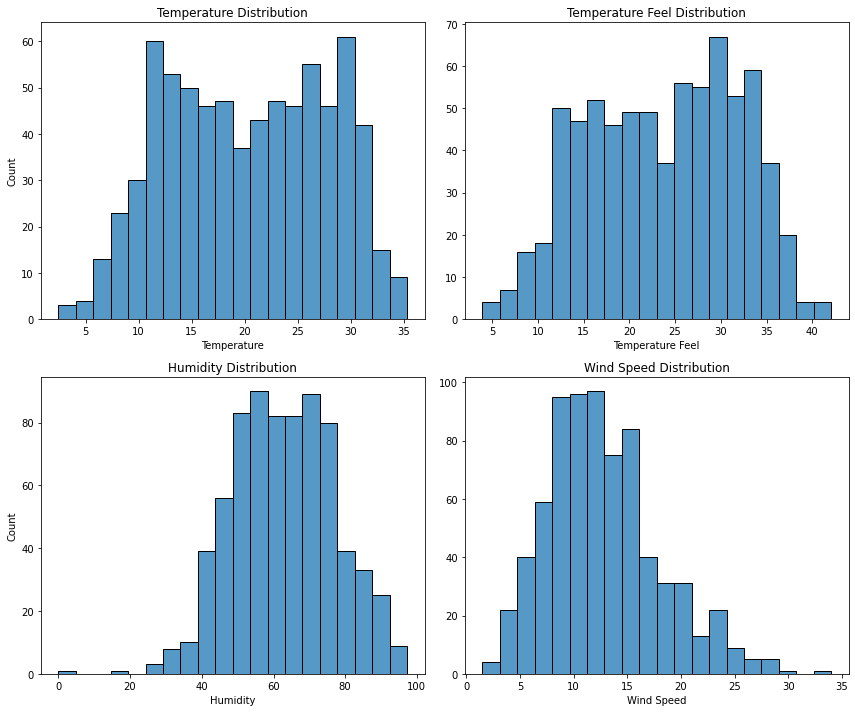

In [27]:
# Data Visualization of Continuous variables

plt.figure(figsize=[12, 10])

plt.subplot(2, 2, 1)
sns.histplot(data=bike_df, x="temp", bins=20)
plt.xlabel("Temperature")
plt.title("Temperature Distribution")

plt.subplot(2, 2, 2)
sns.histplot(data=bike_df, x="atemp", bins=20).set(ylabel=None)
plt.xlabel("Temperature Feel")
plt.title("Temperature Feel Distribution")

plt.subplot(2, 2, 3)
sns.histplot(data=bike_df, x="hum", bins=20)
plt.xlabel("Humidity")
plt.title("Humidity Distribution")

plt.subplot(2, 2, 4)
sns.histplot(data=bike_df, x="windspeed", bins=20).set(ylabel=None)
plt.xlabel("Wind Speed")
plt.title("Wind Speed Distribution")

plt.tight_layout()
plt.show()

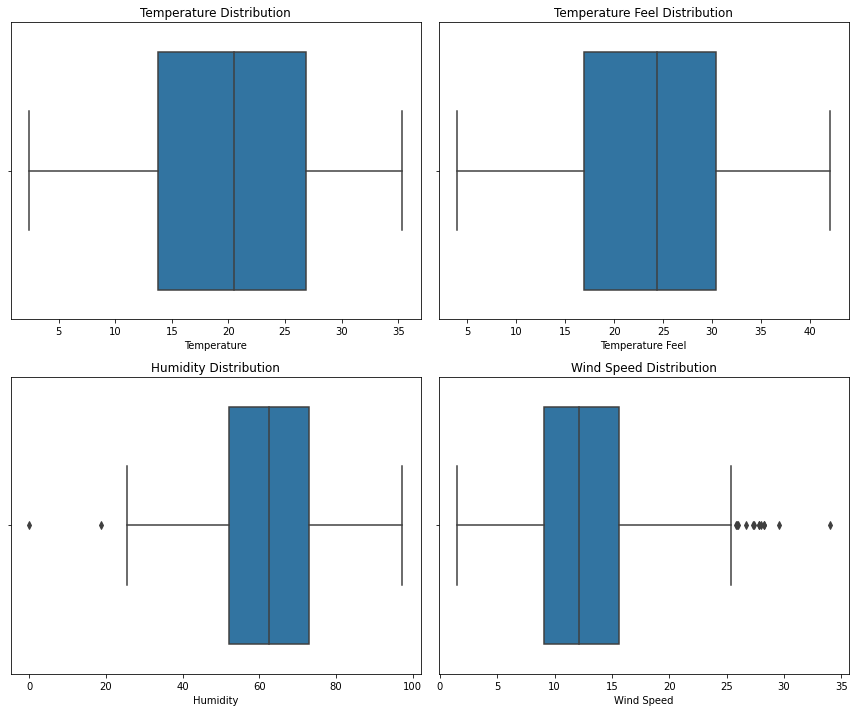

In [28]:
#Outliers Analysis

plt.figure(figsize=[12, 10])

plt.subplot(2, 2, 1)
sns.boxplot(data=bike_df, x="temp")
plt.xlabel("Temperature")
plt.title("Temperature Distribution")

plt.subplot(2, 2, 2)
sns.boxplot(data=bike_df, x="atemp").set(ylabel=None)
plt.xlabel("Temperature Feel")
plt.title("Temperature Feel Distribution")

plt.subplot(2, 2, 3)
sns.boxplot(data=bike_df, x="hum")
plt.xlabel("Humidity")
plt.title("Humidity Distribution")

plt.subplot(2, 2, 4)
sns.boxplot(data=bike_df, x="windspeed").set(ylabel=None)
plt.xlabel("Wind Speed")
plt.title("Wind Speed Distribution")

plt.tight_layout()
plt.show()

#### Analysis

1. Temperature has a mean of around 20 degrees Celsius and Temperature Feel has a mean of around 24. None of this are normally distributed but doesn't have too much outliers either.
2. Humidity has a mean of around 63 and the distribution is normal with a slight left skew. Not a lot of outliers observed.
3. Windspeed has a mean of around 13 and its distribution is normal. It has a few outliers in higher range between 25-35.

### 6.2 Bivariate and Multivariate Analysis

Lets first conduct the analysis with numeric/continuous independent variables and their relationship with target variable 'cnt'


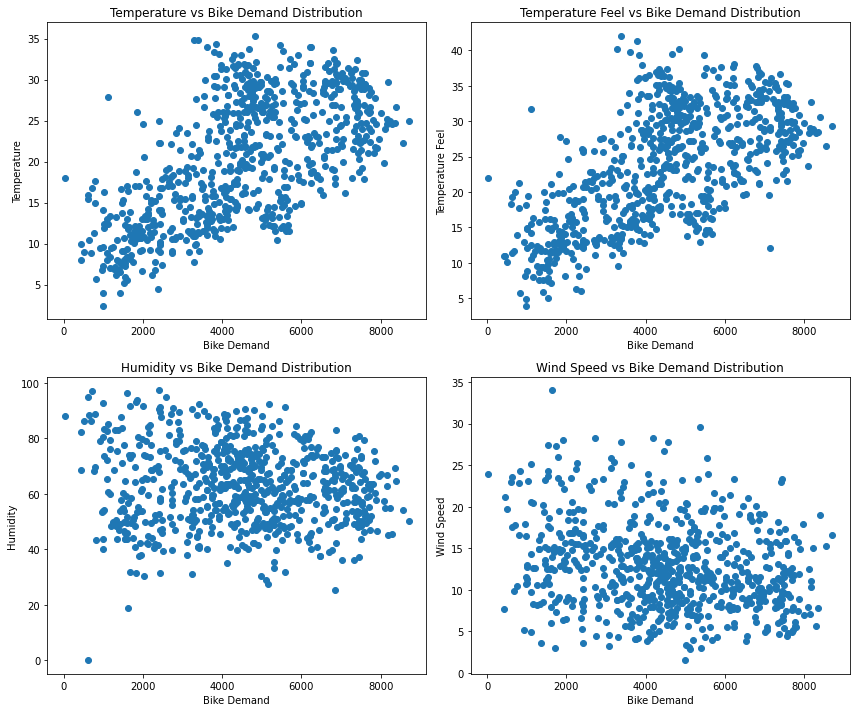

In [29]:
plt.figure(figsize=[12, 10])

plt.subplot(2, 2, 1)
plt.scatter(data=bike_df, x="cnt", y="temp")
plt.xlabel("Bike Demand")
plt.ylabel("Temperature")
plt.title("Temperature vs Bike Demand Distribution")

plt.subplot(2, 2, 2)
plt.scatter(data=bike_df, x="cnt", y="atemp")
plt.xlabel("Bike Demand")
plt.ylabel("Temperature Feel")
plt.title("Temperature Feel vs Bike Demand Distribution")

plt.subplot(2, 2, 3)
plt.scatter(data=bike_df, x="cnt", y="hum")
plt.xlabel("Bike Demand")
plt.ylabel("Humidity")
plt.title("Humidity vs Bike Demand Distribution")

plt.subplot(2, 2, 4)
plt.scatter(data=bike_df, x="cnt", y="windspeed")
plt.xlabel("Bike Demand")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs Bike Demand Distribution")

plt.tight_layout()
plt.show()

#### Analysis
1. Bike Demand has a linear positive trend with Temperature. Higher temperature has higher demand.

2. Bike Demand has similar trend with Temperature feel. 

3. Bike Demand seem to be higher with higher humidity.

4. Lower Windspeed has higher bike demand.

Lets now conduct analysis between "cnt" or bike demand with categorical variables


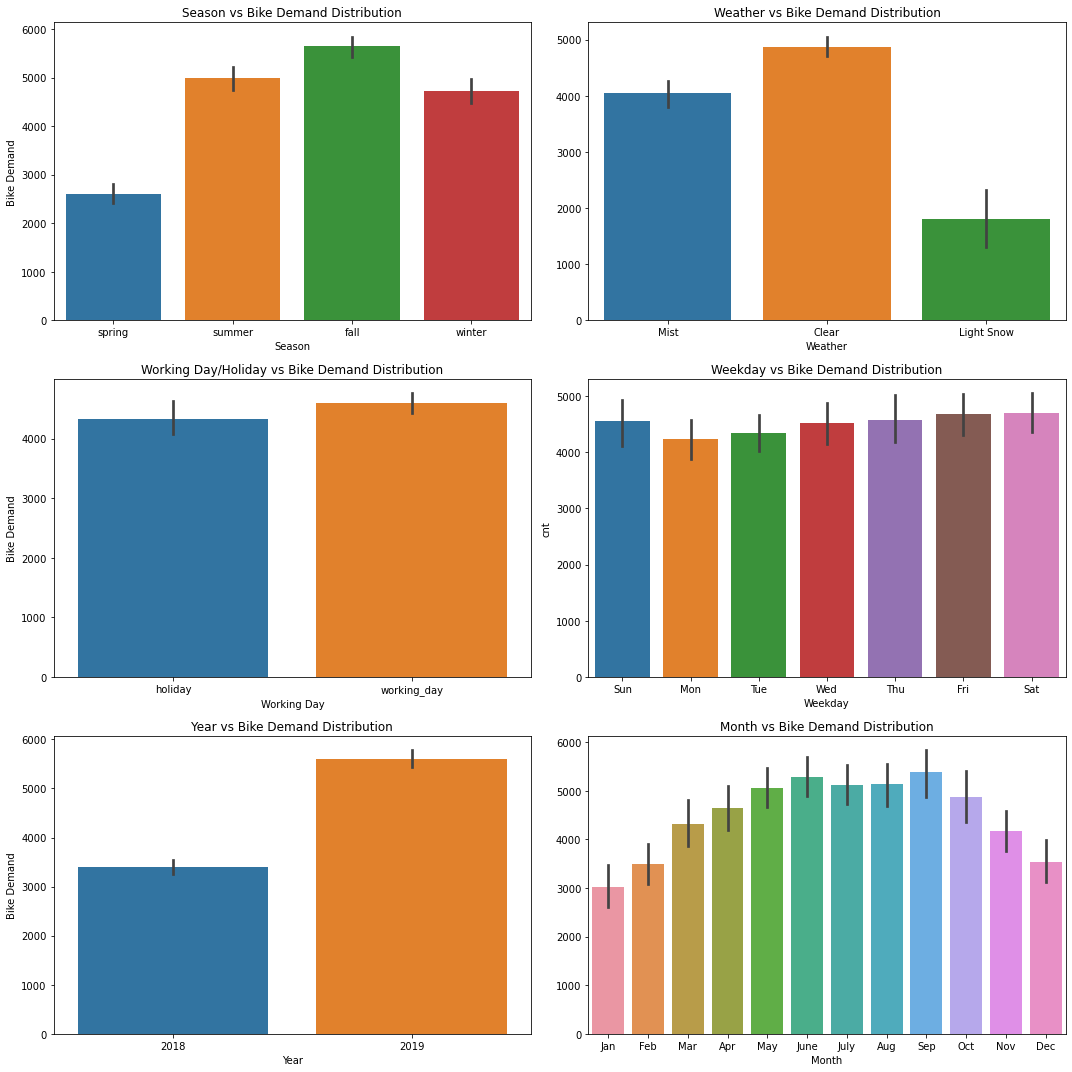

In [30]:
# Bivariate Analysis of Catagorical variables

plt.figure(figsize=[15, 15])

plt.subplot(3, 2, 1)
sns.barplot(data=bike_df, x="season", y="cnt")
plt.xlabel("Season")
plt.ylabel("Bike Demand")
plt.title("Season vs Bike Demand Distribution")

plt.subplot(3, 2, 2)
sns.barplot(data=bike_df, x="weathersit", y="cnt").set(ylabel=None)
plt.xlabel("Weather")
plt.title("Weather vs Bike Demand Distribution")

plt.subplot(3, 2, 3)
sns.barplot(data=bike_df, x="workingday", y="cnt")
plt.xlabel("Working Day")
plt.ylabel("Bike Demand")
plt.title("Working Day/Holiday vs Bike Demand Distribution")

plt.subplot(3, 2, 4)
sns.barplot(data=bike_df, x="weekday", y="cnt")
plt.xlabel("Weekday")
plt.title("Weekday vs Bike Demand Distribution")

plt.subplot(3, 2, 5)
sns.barplot(data=bike_df, x="year", y="cnt")
plt.xlabel("Year")
plt.ylabel("Bike Demand")
plt.title("Year vs Bike Demand Distribution")

plt.subplot(3, 2, 6)
sns.barplot(data=bike_df, x="month", y="cnt").set(ylabel=None)
plt.xlabel("Month")
plt.title("Month vs Bike Demand Distribution")

plt.tight_layout()
plt.show()

In [32]:
# Which days have naximum demand

bike_df.groupby(by="weekday")["cnt"].max()

weekday
Fri    7804
Mon    8227
Sat    8362
Sun    8714
Thu    8173
Tue    7525
Wed    7767
Name: cnt, dtype: int64

#### Analysis

1. There is higher bike demand during the Fall season
2. Clear Weather also leads to increase in bike demand
3. There are slightly more demands for bikes during working days
4. Weekend (Saturday and Sunday) seems to have higher demand
5. The demand for bike sharing had increased from 2018 to 2019
6. Summer and Fall have higher demand as seen from the months distribution

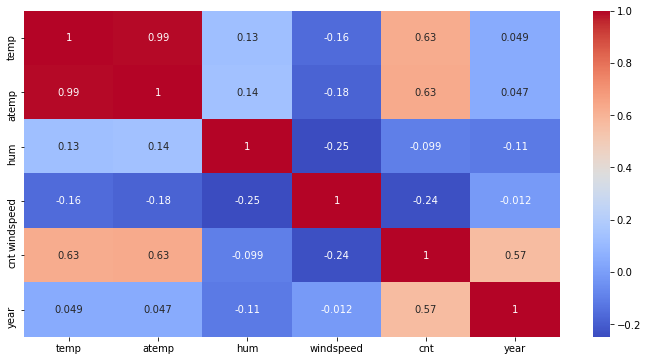

In [33]:
# Lets plot a heatmap

plt.figure(figsize=[12,6])

sns.heatmap(bike_df.corr(), cmap="coolwarm", annot=True)
plt.show()

#### Analysis

1. Both temperature ("temp") and temperature feel ("atemp") have high correlation with each other which signifies multicollinearity. One of them can be dropped.

2. Year ("year") has high positive correlation with bike demand as we have also seen in earlier bivariate analysis.

3. Similary temperature ("temp") and temperature feel ("atemp") have high positive correlation with bike demand. Higher temperature tends to increase demand.

4. Windspeed has a mild negative correlation with bike demand. Usually molder conditions will drive demand.

In [34]:
# Dropping the Temperature Feel variable
bike_df = bike_df.drop(["atemp"], axis=1)

In [35]:
# Change Year back to binary values

bike_df["year"] = bike_df["year"].map({2018: 0, 2019: 1})
bike_df["year"].unique()

array([0, 1])

## 7. Preprocessing

### Dummy Variable creation

We need to now create dummy variables for categorical independent variables to encode thema nd make them numeric before proceeding to model building. Categorical variables with 2 or more unique values need to be encoded. The rule is to create n-1 dummy variables for n levels of a categorical variable

In [36]:
seasons = pd.get_dummies(bike_df['season'], drop_first=True, dtype=int)

week_day= pd.get_dummies(bike_df['weekday'], drop_first=True, dtype=int)

working_day = pd.get_dummies(bike_df['workingday'], drop_first=True, dtype=int)

weather= pd.get_dummies(bike_df['weathersit'], drop_first=True, dtype=int)

month= pd.get_dummies(bike_df['month'], drop_first=True, dtype=int)


In [37]:
# Now lets proceed to add these columns to original bike_df dataset

bike_df = pd.concat([bike_df, seasons, week_day, working_day, weather, month],axis=1)

In [38]:
bike_df.head()

,season,weekday,workingday,weathersit,temp,hum,windspeed,cnt,year,month,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,spring,Sun,holiday,Mist,14.110847,80.5833,10.749882,985,0,Jan,...,0,0,1,0,0,0,0,0,0,0
1,spring,Mon,holiday,Mist,14.902598,69.6087,16.652113,801,0,Feb,...,0,1,0,0,0,0,0,0,0,0
2,spring,Tue,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Mar,...,0,0,0,0,0,1,0,0,0,0
3,spring,Wed,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Apr,...,0,0,0,0,0,0,0,0,0,0
4,spring,Thu,working_day,Clear,9.305237,43.6957,12.522300,1600,0,May,...,0,0,0,0,0,0,1,0,0,0


In [39]:
# Dropping the original categorical variables as we have corresponding dummy variables for them.

bike_df = bike_df.drop(['season','workingday','weathersit','weekday','month'],axis=1)

In [40]:
bike_df.head()

,temp,hum,windspeed,cnt,year,spring,summer,winter,Mon,Sat,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,14.110847,80.5833,10.749882,985,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,14.902598,69.6087,16.652113,801,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,8.050924,43.7273,16.636703,1349,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,8.200000,59.0435,10.739832,1562,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.305237,43.6957,12.522300,1600,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


All the data is now numerical and ready for the modelling stage

## 8. Train-Test Split

In [41]:
# Splitting the dataset into train and test sets
# Import the train_test_split function from apporpriate library and do the splits with train:test data ratio 70:30

from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(bike_df, test_size=0.3, random_state=100)


In [42]:
# Check the train and test DataFrames

train_df.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'year', 'spring', 'summer', 'winter',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'working_day', 'Light Snow',
       'Mist', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object')

In [43]:
train_df.shape

(511, 28)

In [44]:
test_df.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'year', 'spring', 'summer', 'winter',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'working_day', 'Light Snow',
       'Mist', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object')

In [45]:
test_df.shape

(219, 28)

The whole dataset is now split into 511 train observations and 219 test observations (which will be kept separate and unseen)

## 9. Scaling

In [46]:
# Import the libraries

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [47]:
# We will scale the numerical variables including the target variable. 
# The dummy variables are already in the form of 0 and 1

numerical_vars = ['temp','hum','windspeed','cnt']

train_df[numerical_vars] = scaler.fit_transform(train_df[numerical_vars])

In [48]:
# Next we will divide the training DataFrame into X and y variables for model building

y_train = train_df["cnt"]
X_train = train_df.drop(["cnt"], axis=1)

In [49]:
X_train.columns

Index(['temp', 'hum', 'windspeed', 'year', 'spring', 'summer', 'winter', 'Mon',
       'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'working_day', 'Light Snow', 'Mist',
       'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sep'],
      dtype='object')

## 10. Feature Selection

I will be using Recursive Feature Elimination method to automatically select few features of interest and then use manual approach of back selection to drop features which are not significant or are multicollinear

In [50]:
# Import necessary libraries

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [51]:
# I will run RFE with target number of features as 10

estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=10) 
selector = selector.fit(X_train, y_train)

In [52]:
# Lets see the features that RFE has automatically selected
selector.support_

array([ True, False, False,  True,  True, False,  True,  True, False,
        True, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False,  True])

In [53]:
pd.DataFrame({"Bike_DF Columns": X_train.columns, "Column Selected Indicator": selector.support_, "Column Ranking": selector.ranking_})

,Bike_DF Columns,Column Selected Indicator,Column Ranking
0,temp,True,1
1,hum,False,7
2,windspeed,False,4
3,year,True,1
4,spring,True,1
5,summer,False,3
6,winter,True,1
7,Mon,True,1
8,Sat,False,16
9,Sun,True,1


In [54]:
selected_features=X_train.columns[selector.support_]
print(selected_features)

Index(['temp', 'year', 'spring', 'winter', 'Mon', 'Sun', 'working_day',
       'Light Snow', 'Mist', 'Sep'],
      dtype='object')


In [55]:
# Create a new DataFrame with only RFE selected features

X_train_selected = X_train[selected_features]

In [56]:
X_train_selected.head()

,temp,year,spring,winter,Mon,Sun,working_day,Light Snow,Mist,Sep
653,-0.121991,1,0,1,0,0,1,0,0,0
576,1.232298,1,0,0,0,0,1,0,0,0
426,-0.421405,1,1,0,0,1,0,0,1,0
728,-1.296629,1,1,0,1,0,0,0,0,0
482,-0.628694,1,0,0,0,1,0,0,1,0


## 11. Manual Feature Selection

Now we will use the Ordinary Least Squares Method using the "statsmodels" library to evaluate the model and select features manually

In [57]:
# Import the statsmodels library

import statsmodels.api as sm

In [58]:
# Add the constant variable before running OLS

X_train_sm1 = sm.add_constant(X_train_selected)

In [59]:
# Create a first linear model with all the 10 selected variables

linearmodel1 = sm.OLS(y_train, X_train_sm1)

In [60]:
# Fit/train the model and check the results

res1 = linearmodel1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.2
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          3.52e-179
Time:                        21:44:07   Log-Likelihood:                -286.57
No. Observations:                 511   AIC:                             595.1
Df Residuals:                     500   BIC:                             641.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.7086      0.126     -5.636      0.000      -0.956      -0.462
temp            0.4400      0.029     14.923      0.000       0.382       0.498
year            1.0474      0.038     27.358      0.000       0.972       1.123
spring         -0.5278      0.070     -7.527      0.000      -0.666      -0.390
winter          0.2429      0.057      4.257      0.000       0.131       0.355
Mon             0.1980      0.129      1.529      0.127      -0.056       0.452
Sun             0.4526      0.129      3.512      0.000       0.199       0.706
working_day     0.4168      0.122      3.415      0.001       0.177       0.656
Light Snow     -1.3209      0.115    -11.517      0.000      -1.546      -1.096
Mist           -0.3464      0.041     -8.508      0.000      -0.426      -0.266
Sep             0.2758      0.072      3.818      0.000       0.134       0.418
==============================================================================
Omnibus:                       79.325   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.770
Skew:                          -0.759   Prob(JB):                     5.15e-48
Kurtosis:                       5.815   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value of 'Mon' is high which means it is insignificant and needs to be dropped

In [61]:
# Drop "Mon"

X_train_sm2 = X_train_sm1.drop(["Mon"], axis=1)

In [62]:
# Create the second linear model with the remaining 9 variables and "const" after dropping "Mon"

linearmodel2 = sm.OLS(y_train, X_train_sm2)

In [63]:
# Fit/train the model and check the results

res2 = linearmodel2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     252.6
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          6.87e-180
Time:                        21:54:59   Log-Likelihood:                -287.77
No. Observations:                 511   AIC:                             595.5
Df Residuals:                     501   BIC:                             637.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5393      0.060     -9.040      0.000      -0.657      -0.422
temp            0.4402      0.030     14.908      0.000       0.382       0.498
year            1.0481      0.038     27.341      0.000       0.973       1.123
spring         -0.5318      0.070     -7.579      0.000      -0.670      -0.394
winter          0.2392      0.057      4.189      0.000       0.127       0.351
Sun             0.2843      0.067      4.237      0.000       0.152       0.416
working_day     0.2480      0.052      4.759      0.000       0.146       0.350
Light Snow     -1.3172      0.115    -11.473      0.000      -1.543      -1.092
Mist           -0.3451      0.041     -8.467      0.000      -0.425      -0.265
Sep             0.2795      0.072      3.868      0.000       0.138       0.422
==============================================================================
Omnibus:                       80.826   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.577
Skew:                          -0.769   Prob(JB):                     1.71e-49
Kurtosis:                       5.860   Cond. No.                         8.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now all the variables seem to be significant as the p-values are close to 0 and less than the required value of 0.05

Now lets carry out the Variance Inflation factor analysis to check for any remaining multicollinearity

In [69]:
# Import the VIF library

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm2.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm2.values,i) 
                 for i in range(len(X_train_sm2.columns))]
vif_data["VIF"] = round(vif_data["VIF"], 4)
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
vif_data

,Feature,VIF
0,const,9.8745
1,spring,2.5103
2,temp,2.4189
3,winter,1.6889
4,working_day,1.6474
5,Sun,1.6319
6,Light Snow,1.0420
7,Mist,1.0409
8,Sep,1.0217
9,year,1.0189


All the VIF values are OK (i.e < 5) except for constant. Lets drop "const" variable from the model

In [65]:
# Drop "const" variable
X_train_sm3 = X_train_sm2.drop(["const"], axis=1)

In [66]:
# Create the third linear model with the remaining 9 variables after dropping "const"

linearmodel3 = sm.OLS(y_train, X_train_sm3)

In [67]:
# Fit/train the model and check the results

res3 = linearmodel3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.790
Model:                            OLS   Adj. R-squared (uncentered):              0.786
Method:                 Least Squares   F-statistic:                              209.8
Date:                Mon, 28 Oct 2024   Prob (F-statistic):                   7.68e-164
Time:                        21:55:55   Log-Likelihood:                         -326.37
No. Observations:                 511   AIC:                                      670.7
Df Residuals:                     502   BIC:                                      708.9
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temp            0.3510      0.030     11.705      0.000       0.292       0.410
year            0.9418      0.039     23.958      0.000       0.865       1.019
spring         -0.8188      0.067    -12.145      0.000      -0.951      -0.686
winter          0.0121      0.055      0.220      0.826      -0.096       0.121
Sun            -0.0449      0.061     -0.739      0.460      -0.164       0.074
working_day    -0.0796      0.040     -1.972      0.049      -0.159      -0.000
Light Snow     -1.3743      0.124    -11.127      0.000      -1.617      -1.132
Mist           -0.4240      0.043     -9.883      0.000      -0.508      -0.340
Sep             0.2398      0.078      3.085      0.002       0.087       0.393
==============================================================================
Omnibus:                       47.219   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.161
Skew:                          -0.481   Prob(JB):                     9.84e-26
Kurtosis:                       5.117   Cond. No.                         6.66
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# Check VIF again

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm3.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm3.values,i) 
                 for i in range(len(X_train_sm3.columns))]
vif_data["VIF"] = round(vif_data["VIF"], 4)
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
vif_data

,Feature,VIF
0,spring,2.6360
1,working_day,2.6356
2,temp,2.1487
3,year,1.8791
4,winter,1.8126
5,Mist,1.5151
6,Sun,1.3618
7,Sep,1.1020
8,Light Snow,1.0703


The VIF values are all less than 5.

Now we have checked for significance and multicollinearity and all remaiming variables are significant

In [70]:
# Now the variables "winter" and "Sun" have high p-value and "working_day" also has a p-value of around 0.05. 
# So we need to drop them one by one
# Lets drop "winter" first and check

X_train_sm4 = X_train_sm3.drop(["winter"], axis=1)


In [71]:
# Create the fourth linear model with the remaining 8 variables after dropping "winter"

linearmodel4 = sm.OLS(y_train, X_train_sm4)

In [72]:
# Fit/train the model and check the results

res4 = linearmodel4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.790
Model:                            OLS   Adj. R-squared (uncentered):              0.787
Method:                 Least Squares   F-statistic:                              236.5
Date:                Mon, 28 Oct 2024   Prob (F-statistic):                   4.95e-165
Time:                        21:57:14   Log-Likelihood:                         -326.40
No. Observations:                 511   AIC:                                      668.8
Df Residuals:                     503   BIC:                                      702.7
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temp            0.3477      0.026     13.386      0.000       0.297       0.399
year            0.9435      0.038     24.512      0.000       0.868       1.019
spring         -0.8262      0.058    -14.180      0.000      -0.941      -0.712
Sun            -0.0412      0.058     -0.706      0.480      -0.156       0.073
working_day    -0.0763      0.037     -2.040      0.042      -0.150      -0.003
Light Snow     -1.3712      0.123    -11.183      0.000      -1.612      -1.130
Mist           -0.4233      0.043     -9.905      0.000      -0.507      -0.339
Sep             0.2412      0.077      3.116      0.002       0.089       0.393
==============================================================================
Omnibus:                       46.850   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.967
Skew:                          -0.478   Prob(JB):                     1.79e-25
Kurtosis:                       5.107   Cond. No.                         6.47
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# Lets drop "Sun" next and check

X_train_sm5= X_train_sm4.drop(["Sun"], axis=1)

In [74]:
# Create the fifth linear model with the remaining 7 variables after dropping "Sun"

linearmodel5 = sm.OLS(y_train, X_train_sm5)

In [75]:
# Fit/train the model and check the results

res5 = linearmodel5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.790
Model:                            OLS   Adj. R-squared (uncentered):              0.787
Method:                 Least Squares   F-statistic:                              270.4
Date:                Mon, 28 Oct 2024   Prob (F-statistic):                   3.72e-166
Time:                        21:57:45   Log-Likelihood:                         -326.65
No. Observations:                 511   AIC:                                      667.3
Df Residuals:                     504   BIC:                                      697.0
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temp            0.3459      0.026     13.386      0.000       0.295       0.397
year            0.9364      0.037     25.205      0.000       0.863       1.009
spring         -0.8347      0.057    -14.644      0.000      -0.947      -0.723
working_day    -0.0673      0.035     -1.914      0.056      -0.136       0.002
Light Snow     -1.3829      0.121    -11.388      0.000      -1.621      -1.144
Mist           -0.4303      0.042    -10.358      0.000      -0.512      -0.349
Sep             0.2373      0.077      3.075      0.002       0.086       0.389
==============================================================================
Omnibus:                       46.993   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.107
Skew:                          -0.483   Prob(JB):                     2.75e-25
Kurtosis:                       5.093   Cond. No.                         6.37
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# We still have "working_day" which has a high p-value of 0.056. Lets drop this and rebuild the model

X_train_sm6 = X_train_sm5.drop(["working_day"], axis=1)

In [77]:
# Create the sixth linear model with the remaining 6 variables after dropping "working_day"

linearmodel6 = sm.OLS(y_train, X_train_sm6)

In [78]:
# Fit/train the model and check the results

res6 = linearmodel6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.788
Model:                            OLS   Adj. R-squared (uncentered):              0.786
Method:                 Least Squares   F-statistic:                              313.2
Date:                Mon, 28 Oct 2024   Prob (F-statistic):                   1.24e-166
Time:                        21:58:22   Log-Likelihood:                         -328.50
No. Observations:                 511   AIC:                                      669.0
Df Residuals:                     505   BIC:                                      694.4
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp           0.3367      0.025     13.227      0.000       0.287       0.387
year           0.9081      0.034     26.574      0.000       0.841       0.975
spring        -0.8644      0.055    -15.720      0.000      -0.972      -0.756
Light Snow    -1.4208      0.120    -11.828      0.000      -1.657      -1.185
Mist          -0.4554      0.040    -11.519      0.000      -0.533      -0.378
Sep            0.2184      0.077      2.846      0.005       0.068       0.369
==============================================================================
Omnibus:                       40.402   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.948
Skew:                          -0.372   Prob(JB):                     3.63e-24
Kurtosis:                       5.125   Cond. No.                         6.12
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-values of the remaining 6 variables are less than 0.05. Now lets compute the VIF once again to ensure we have also resolved any pending multicollinearity issues

In [79]:
# Check VIF again

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm6.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm6.values,i) 
                 for i in range(len(X_train_sm6.columns))]
vif_data["VIF"] = round(vif_data["VIF"], 4)
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
vif_data

,Feature,VIF
0,spring,1.7495
1,temp,1.5454
2,year,1.4168
3,Mist,1.2834
4,Sep,1.0715
5,Light Snow,1.0100


Now we have a stable model where remaining variables have good p-values less than 0.05 and also VIF of less than 2. Lets now proceed to perform residual analysis of the model

## 12. Residual analysis of the train data

In [80]:
# Lets get the predicted value of dependent variable in train dataset and analyze error terms

y_train_pred = res6.predict(X_train_sm6)

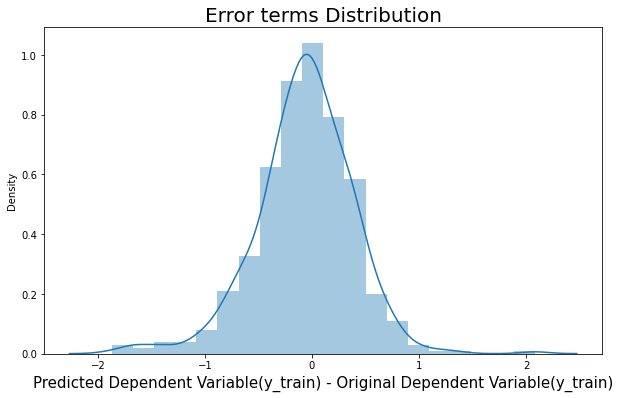

In [81]:
# Lets plot the error term

plt.figure(figsize=[10,6])
sns.distplot((y_train - y_train_pred), bins=20)
plt.title("Error terms Distribution", fontsize=20)
plt.xlabel("Predicted Dependent Variable(y_train) - Original Dependent Variable(y_train)", fontsize=15)
plt.show()

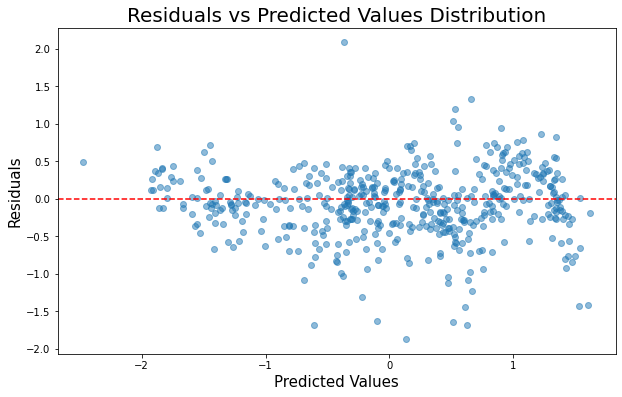

In [82]:
# Check in case of any visible patterns in error terms or if there is constant variance (homoscedasticity)

plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, (y_train-y_train_pred), alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Predicted Values Distribution", fontsize=20)
plt.xlabel("Predicted Values", fontsize=15)
plt.ylabel("Residuals", fontsize=15)
plt.show()

#### Analysis

1. The R2 score we received (in the final model) vs. the adjusted R2 are 0.788 and 0.786 which are pretty close. This signifies there are no more independent variables which are redundant and adding penalty to the score. The model is stable

2. The Plot of Error terms is a Normal Distribution with a mean of 0

3. There’s no clear pattern in the scatter plot of residuals vs predicted values, indicating homoscedasticity (constant variance) across predicted values.


 ## 13. Making Predictions using Final Model

In [83]:
# Transform the test dataset

numerical_vars = ['temp','hum','windspeed','cnt']

test_df[numerical_vars] = scaler.transform(test_df[numerical_vars])

In [84]:
# Split the data in X_test and y_test

y_test = test_df["cnt"]
X_test = test_df.drop(["cnt"], axis=1)

In [85]:
# Lets check the final features that were used in final model. We will use the same for test set.
X_train_sm6.columns

Index(['temp', 'year', 'spring', 'Light Snow', 'Mist', 'Sep'], dtype='object')

In [86]:
# Filter the X_test dataset with columns that were used for final model

X_test_filtered = X_test[X_train_sm6.columns]

In [87]:
# Make the predictions
y_test_pred = res6.predict(X_test_filtered)

 ## 14. Model Evaluation

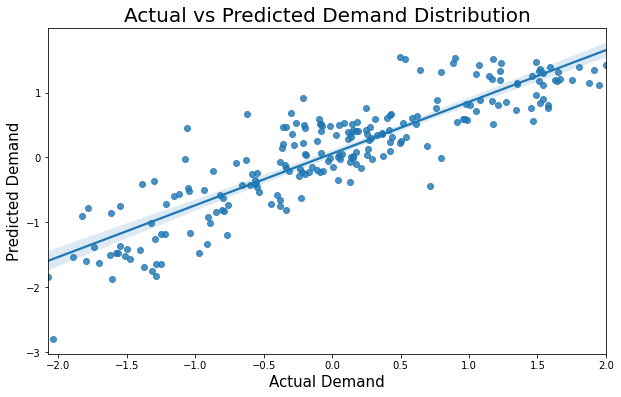

In [88]:
# Lets check the distribution between actual and predicted values of bike demand

plt.figure(figsize=[10,6])
sns.regplot(y_test, y_test_pred)
plt.xlabel("Actual Demand", fontsize=15)
plt.ylabel("Predicted Demand", fontsize=15)
plt.title("Actual vs Predicted Demand Distribution", fontsize=20)
plt.show()

In [89]:
# Lets check the R2 scores of train and test

from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train Score:\n",round(r2_train,3))
print("Test Score:\n",round(r2_test,3))

Train Score:
 0.788
Test Score:
 0.784


**Note**: The prediction on the unseen test data has been run only once and the conclusions below adhere to that

## 15. Conclusion

Lets reflect on the model prediction performance. 
- The train and test R2 scores are quite close which means there is no overfitting/underfitting in the model and it is quite stable
- The error terms were normally distributed so the p-values computed for the predictor variable coefficients are reliable.
- The model is not very complex and the final one contains 6 features shortlisted after Recursive Feature Elimination (RFE) automated process and manual feature selection from 28 features (post dummy variables and scaling)

Now the linear modelling has been concluded. Lets check if the business objective has been achieved.

Recommendation on Significant variables: These variables are following:
 1. **Spring Season:** The variable "spring" has a coefficient/weightage of -0.8644. The bike demand will significantly fall in spring and the company needs to invest in some marketing strategies to attract more people during spring. "Summer" and "Fall" seasons drives demands up.
 
 2. **Year:** This variable "year" has a coefficient/weightage of 0.9081. Year on year demand is increasing. Covid-19 may have temporarily stifled demand but as the pandemic is gone now (or is less serious) the demand is expected to rise again. People are also becoming more climate conscious and prefer bikes for shorter transits and for health benefits.
 
 3.  **Weather Conditions:** Weathersit variables like "Light Snow" (coefficient/weightage of -1.4208) or "Mist" (coefficient/weightage of -0.4554) drives demands down. 
 
 4. **Temperature:** This variable "temp" has a coefficient/weightage of 0.3367. In general as temperature gets warmer, demand rises. This could be also observed as "Winter" season or "Light Snow" (weathersit original catageorical variable level) drives demands down.
 
 